# Logistic Regression Proyect
## Table of contents
### Explore Data Analysis (EDA)

* [0. Problem Statement](#co)
* [1. Importing libraries](#c1)
* [2. Data Collection](#c2)
* [3. Exploration and Data Cleaning](#c3)
  * [3.1 Drop Duplicate Information](#c3-1)
  * [3.2 Drop Irrelevant Information](#c3-2)
* [4. Univariate Analysis](#c4)
  * [4.1 Dividing our dataset into categorical and numerical](#c4-1)
  * [4.2 Categorical Variable Analysis](#c4-2)
  * [4.3 Numerical Variable Analysis](#c4-3)
* [5. Multivariate Analysis](#c5)
  * [5.1 Encoding Categorical Values and Saving JSON Files](#c5-1)
  * [5.2 Numerical-Categorical Analysis](#c5-2)
* [6. Feature Engineering](#c6)
  * [6.1 New Feature Inference](#c6-1)
  * [6.2 Outliers Analysis](#c6-2)
  * [6.3 Missing Values Analysis](#c6-3)
  * [6.4 Split train/test of both Data Frames](#c6-4)
* [7. Data Processing](#c7)
  * [7.1 Normalization](#c7-1)
  * [7.2 Minmax Scalation](#c7-2)

### Machine Learning

* [8. Machine Learning](#c8)
  * [8.1 Which is the best dataset?](#c8-1)
  * [8.2 Model Optimization](#c8-2)
  * [8.3 Evaluation of the Model](#c8-3)

## 0. Problem Statement <a id='c0'></a>

The objective of this exercise is to conduct an in-depth EDA analysis and develop a predictive tree-decision model to determine if an individual based on health data will develop diabetes or not.

## 1. Importing libraries <a id='c1'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import warnings
import pickle
from pickle import dump
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import make_classification

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

## 2. Data Collection <a id='c2'></a>

In [2]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'

def get_data(URL:str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=',')
    total_data.head()
    return total_data

get_data(URL)
total_data = get_data(URL)

## 3. Exploration and Data Cleaning <a id='c3'></a>

#### 3.1 Drop Duplicate Information <a id='c3-1'></a>

In this case, we don't delete any row beacause there is no duplicated data

In [3]:
total_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 3.2 Drop Irrelevant Information <a id='c3-2'></a>

Since al data is relevant, we don't delete any column

## 4. Univariate Analysis <a id='c4'></a>

### 4.1 Dividing our dataset into categorical and numerical <a id='c4-1'></a>

We don't have any categorical variables in this dataset, so we will only work with numerical variables.

In [4]:
numerical_variables = total_data.select_dtypes(include=['number']).columns.tolist()
numerical_variables.remove('Outcome')
print("Numerical Variables:", numerical_variables)

categorical_variables = total_data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_variables.append('Outcome')
print("Categorical Variables:", categorical_variables)

print(total_data.dtypes)

Numerical Variables: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categorical Variables: ['Outcome']
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### 4.2 Categorical Variable Analysis <a id='c4-2'></a>

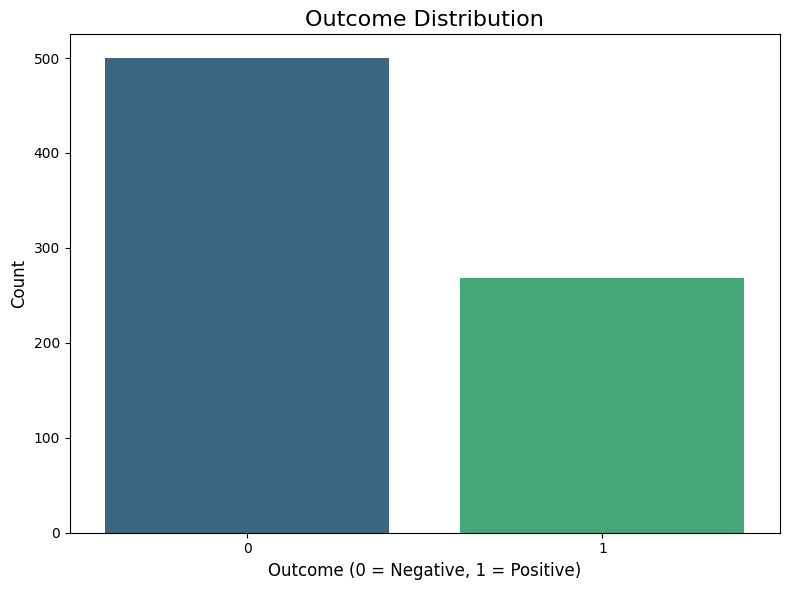

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=total_data, x="Outcome", palette='viridis')
plt.title("Outcome Distribution", fontsize=16)
plt.xlabel("Outcome (0 = Negative, 1 = Positive)", fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

**Conclusions**:

- We can observe a significant disparity exists between the two outcome classes. The dataset contains a larger number of individuals who are not diabetic (Outcome 0), with a total count of approximately 500, compared to those with a positive diabetes diagnosis (Outcome 1), who number around 260. This highlights a class imbalance within the target variable. This is expected as this data is provided by the National Institute of Diabetes and Digestive and Kidney Diseases.

### 4.3 Numerical Variable Analysis <a id='c4-3'></a>

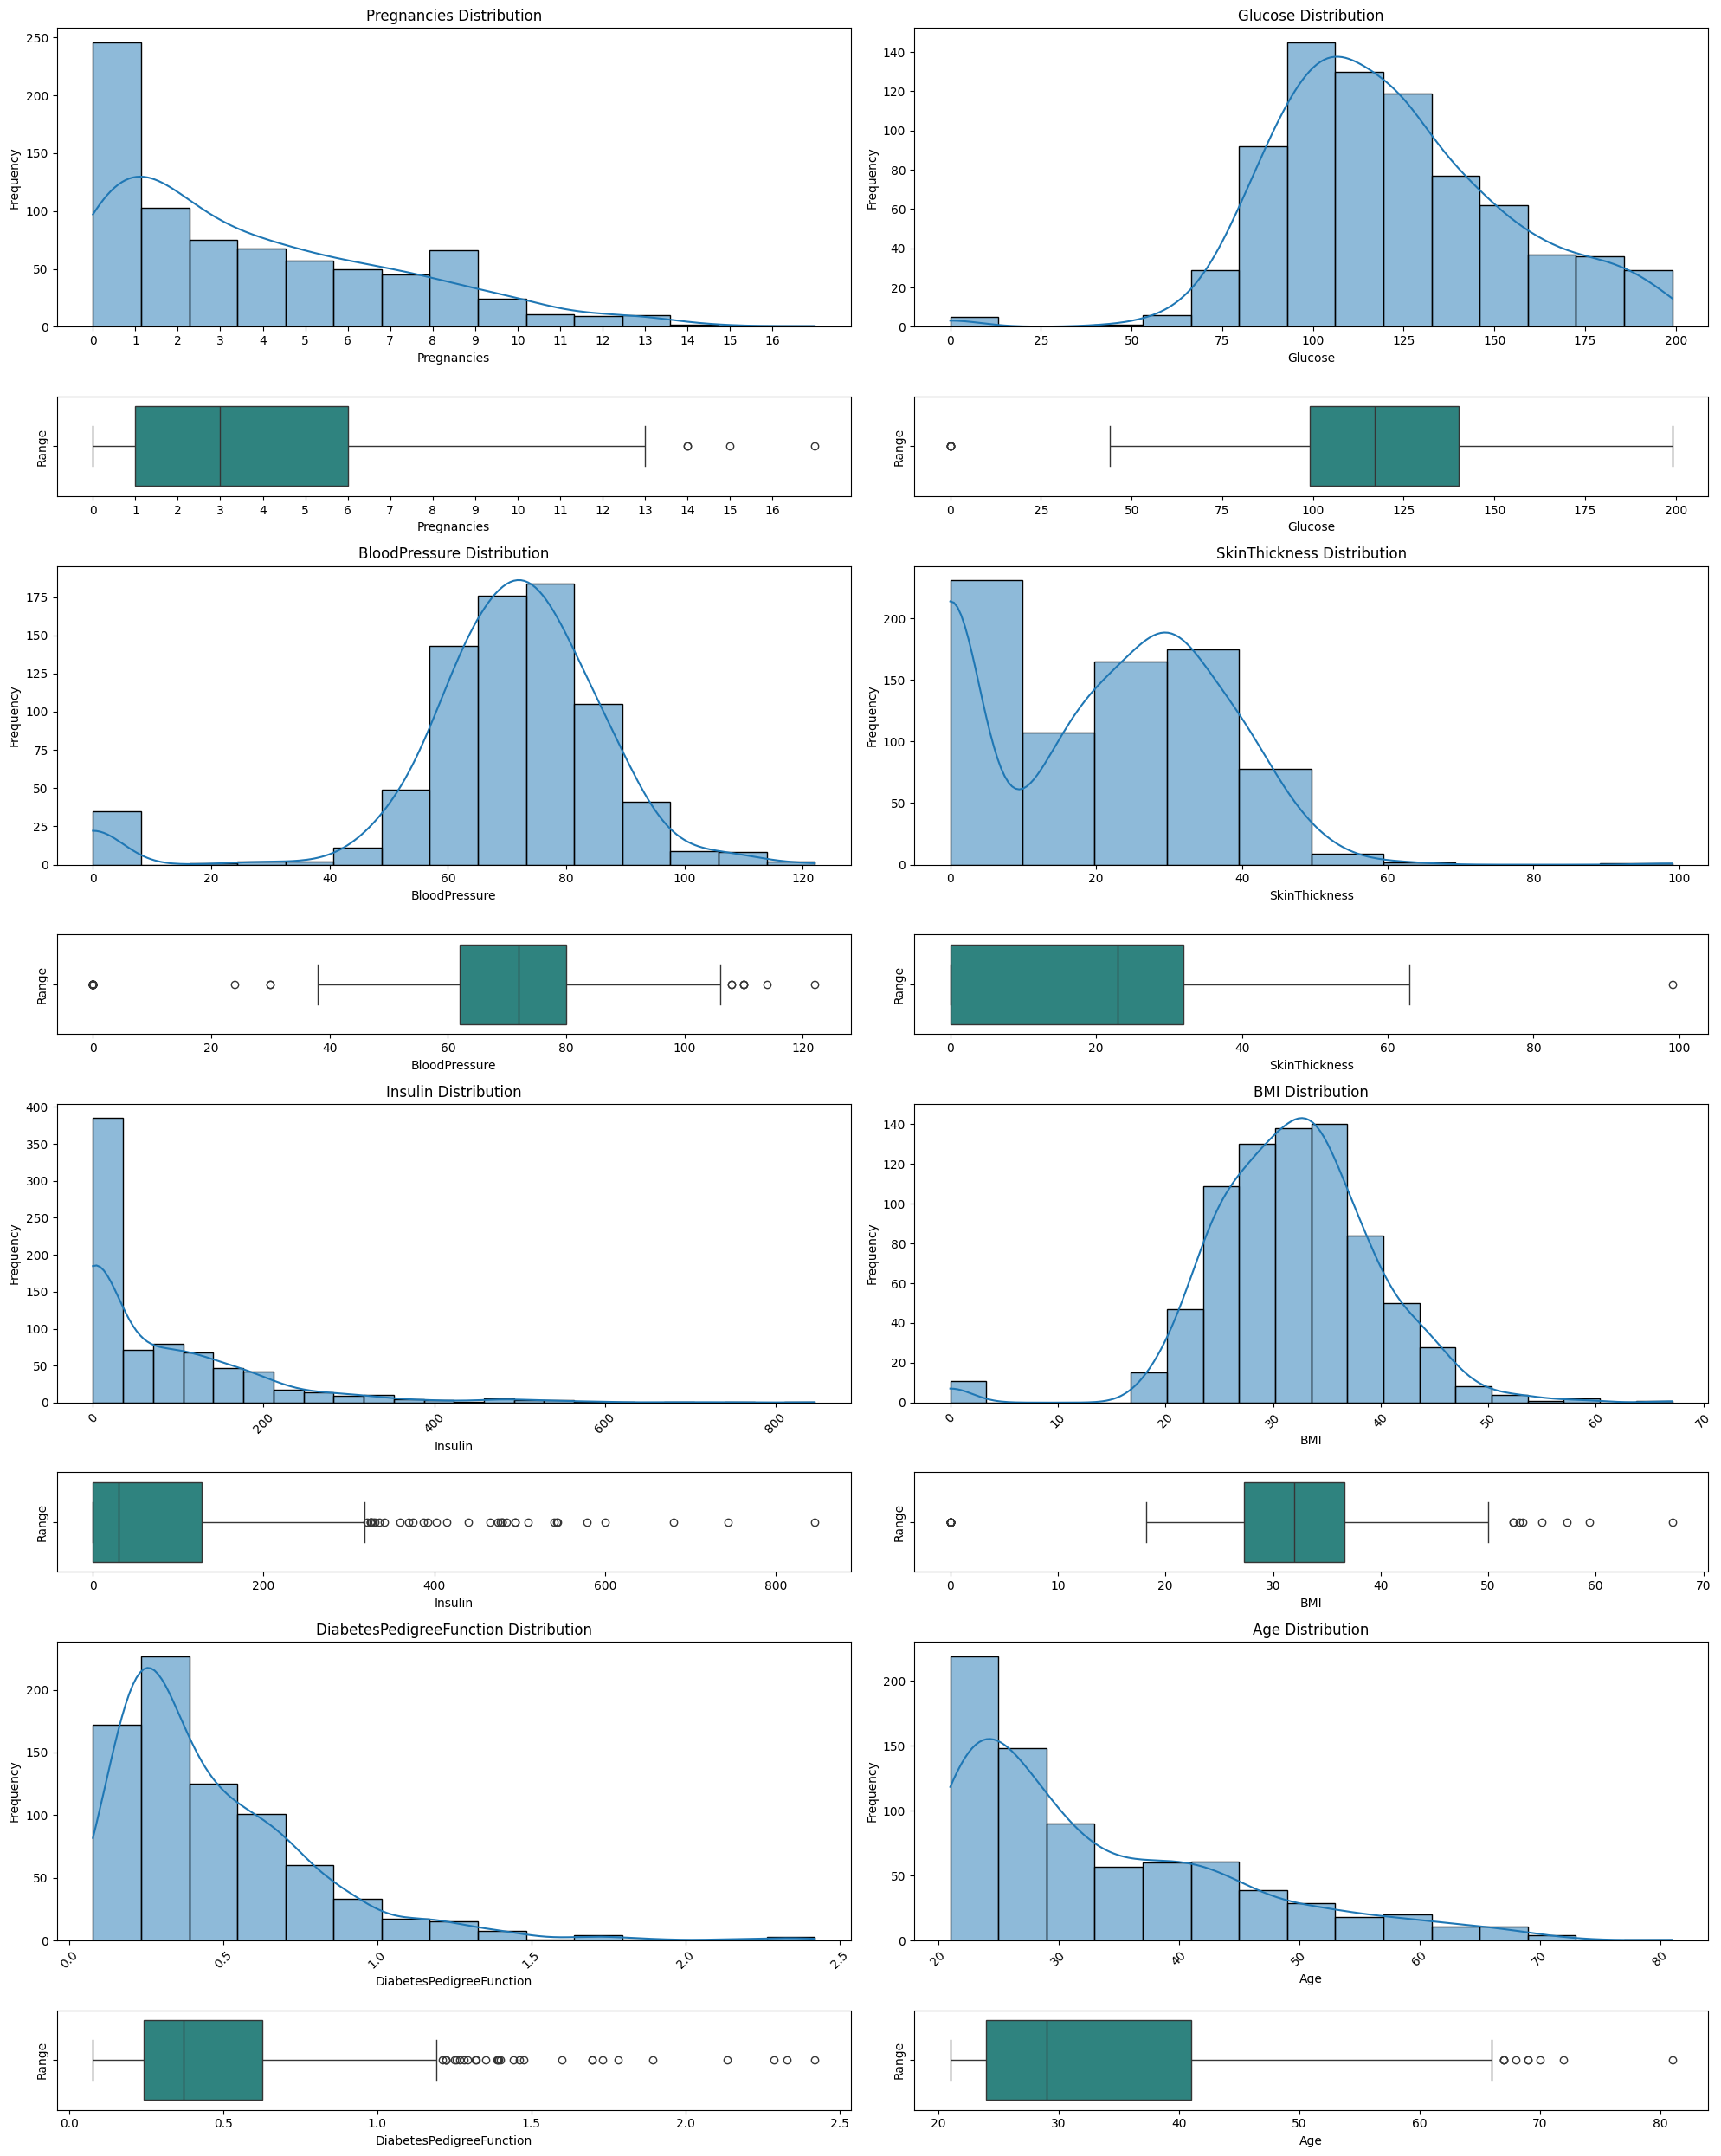

In [6]:
num_vars = len(numerical_variables)
nrows = num_vars // 2 + (num_vars % 2)
total_rows = nrows * 2
fig, axes = plt.subplots(
    nrows = total_rows,
    ncols=2,
    figsize=(20, 25),
    gridspec_kw={"height_ratios": [6, 2] * nrows}
)


# --- Row 0, Column 0: 'Pregnancies' ---
# Histplot
sns.histplot(
    data=total_data, x="Pregnancies", kde=True, bins=15, ax=axes[0, 0], palette="viridis"
)
axes[0, 0].set_title("Pregnancies Distribution", fontsize=12)
axes[0, 0].set_ylabel("Frequency", fontsize=10)
x_ticks_pregnancies = np.arange(0, total_data['Pregnancies'].max())
axes[0, 0].set_xticks(x_ticks_pregnancies)

# Boxplot
sns.boxplot(data=total_data, x="Pregnancies", ax=axes[1, 0], palette="viridis")
axes[1, 0].set_ylabel("Range", fontsize=10)
axes[1, 0].tick_params(axis="y", labelleft=False)
axes[1, 0].set_xticks(x_ticks_pregnancies)


# --- Row 0, Column 1: 'Pregnancies' ---
# Histplot
sns.histplot(
    data=total_data, x="Glucose", kde=True, bins=15, ax=axes[0, 1], palette="viridis"
)
axes[0, 1].set_title("Glucose Distribution", fontsize=12)
axes[0, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="Glucose", ax=axes[1, 1], palette="viridis")
axes[1, 1].set_ylabel("Range", fontsize=10)
axes[1, 1].tick_params(axis="y", labelleft=False)


# --- Row 1, Column 0: 'BloodPressure' ---
# Histplot
sns.histplot(
    data=total_data, x="BloodPressure", kde=True, bins=15, ax=axes[2, 0], palette="viridis"
)
axes[2, 0].set_title("BloodPressure Distribution", fontsize=12)
axes[2, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="BloodPressure", ax=axes[3, 0], palette="viridis")
axes[3, 0].set_ylabel("Range", fontsize=10)
axes[3, 0].tick_params(axis="y", labelleft=False)


# --- Row 1, Column 1: 'SkinThickness' ---
# Histplot
sns.histplot(
    data=total_data, x="SkinThickness", kde=True, bins=10, ax=axes[2, 1], palette="viridis"
)
axes[2, 1].set_title("SkinThickness Distribution", fontsize=12)
axes[2, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="SkinThickness", ax=axes[3, 1], palette="viridis")
axes[3, 1].set_ylabel("Range", fontsize=10)
axes[3, 1].tick_params(axis="y", labelleft=False)


# --- Row 2, Column 0: 'Insulin' ---
# Histplot
sns.histplot(
    data=total_data, x="Insulin", kde=True, bins=24, ax=axes[4, 0], palette="viridis"
)
axes[4, 0].set_title("Insulin Distribution", fontsize=12)
axes[4, 0].set_ylabel("Frequency", fontsize=10)
axes[4, 0].tick_params(axis="x", rotation=45)

# Boxplot
sns.boxplot(data=total_data, x="Insulin", ax=axes[5, 0], palette="viridis")
axes[5, 0].set_ylabel("Range", fontsize=10)
axes[5, 0].tick_params(axis="y", labelleft=False)


# --- Row 2, Column 1: 'BMI' ---
# Histplot
sns.histplot(
    data=total_data, x="BMI", kde=True, bins=20, ax=axes[4, 1], palette="viridis"
)
axes[4, 1].set_title("BMI Distribution", fontsize=12)
axes[4, 1].set_ylabel("Frequency", fontsize=10)
axes[4, 1].tick_params(axis="x", rotation=45)

# Boxplot
sns.boxplot(data=total_data, x="BMI", ax=axes[5, 1], palette="viridis")
axes[5, 1].set_ylabel("Range", fontsize=10)
axes[5, 1].tick_params(axis="y", labelleft=False)


# --- Row 3, Column 0: 'DiabetesPedigreeFunction' ---
# Histplot
sns.histplot(
    data=total_data, x="DiabetesPedigreeFunction", kde=True, bins=15, ax=axes[6, 0], palette="viridis"
)
axes[6, 0].set_title("DiabetesPedigreeFunction Distribution", fontsize=12)
axes[6, 0].set_ylabel("Frequency", fontsize=10)
axes[6, 0].tick_params(axis="x", rotation=45)

# Boxplot
sns.boxplot(data=total_data, x="DiabetesPedigreeFunction", ax=axes[7, 0], palette="viridis")
axes[7, 0].set_ylabel("Range", fontsize=10)
axes[7, 0].tick_params(axis="y", labelleft=False)


# --- Row 3, Column 1: 'Age' ---
# Histplot
sns.histplot(
    data=total_data, x="Age", kde=True, bins=15, ax=axes[6, 1], palette="viridis"
)
axes[6, 1].set_title("Age Distribution", fontsize=12)
axes[6, 1].set_ylabel("Frequency", fontsize=10)
axes[6, 1].tick_params(axis="x", rotation=45)

# Boxplot
sns.boxplot(data=total_data, x="Age", ax=axes[7, 1], palette="viridis")
axes[7, 1].set_ylabel("Range", fontsize=10)
axes[7, 1].tick_params(axis="y", labelleft=False)

plt.tight_layout()
plt.show()

**Conclusions:**

- **Pregnancies**: We can observe a right-skewed distribution, with most individuals having 0 pregnancies.
- **Glucose**: The distribution is right-skewed, indicating that most individuals have lower glucose levels, with a few outliers having very high values. a healthy individual typically has a glucose level between 70 and 100 mg/dL as a normal range in fasting conditions that are typically used to take a diabetes test. We can observe that a large number of individuals have glucose levels higher than the normal range, indicating a potential risk of diabetes which is expected as this data is provided by the National Institute of Diabetes and Digestive and Kidney Diseases.
- **Blood Pressure**: This is a normal distribution, with most individuals having a blood pressure around 70-80 mmHg with a prominent peak in 0 which is likely due to individuals with no blood pressure measurement recorded or an error in data entry.
- **Skin Thickness**: As we can observe, this is a positive skewed distribution, with most individuals having skin thickness around 20-40 mm, with a few outliers having very high values and some individuals with no skin thickness measurement recorded or an error in data entry.
- **Insulin**: The plot's distribution is right-skewed, with most individuals having low insulin levels, and a few outliers with very high values. There is a significant number of individuals with no insulin measurement recorded or an error in data entry or with 0 insulin which is an expected value for individuals who has type 1 diabetes.
- **BMI**: As we can observe, the plot shows a normal distribution, with most individuals having a BMI around 22-37 kg/m², with a few outliers having very high values. A wide spectrum of individuals have some type of overweight and obesity, which is a risk factor for diabetes.
- **Diabetes Pedigree Function**: This is a function that indicates the likelihood of diabetes based on family history. The distribution is right-skewed, with most individuals having a value around 0.5, indicating a moderate risk of diabetes. A few individuals have very high values, indicating a higher risk of diabetes.
- **Age**: The distribution is right-skewed, with most individuals being between 20 and 50 years old, with a few outliers being older than 70 years.

## 5. Multivariate Analysis <a id='c5'></a>

### 5.1 Encoding Categorical Values and Saving JSON Files <a id='c5-1'></a>

Since the only categorical variable we have is the target variable, and it is already coded, no additional coding is necessary. Where 0 represents the individual does not have diabetes and 1 represents the individual has diabetes.

### 5.2 Numerical-Categorical Analysis <a id='c5-2'></a>

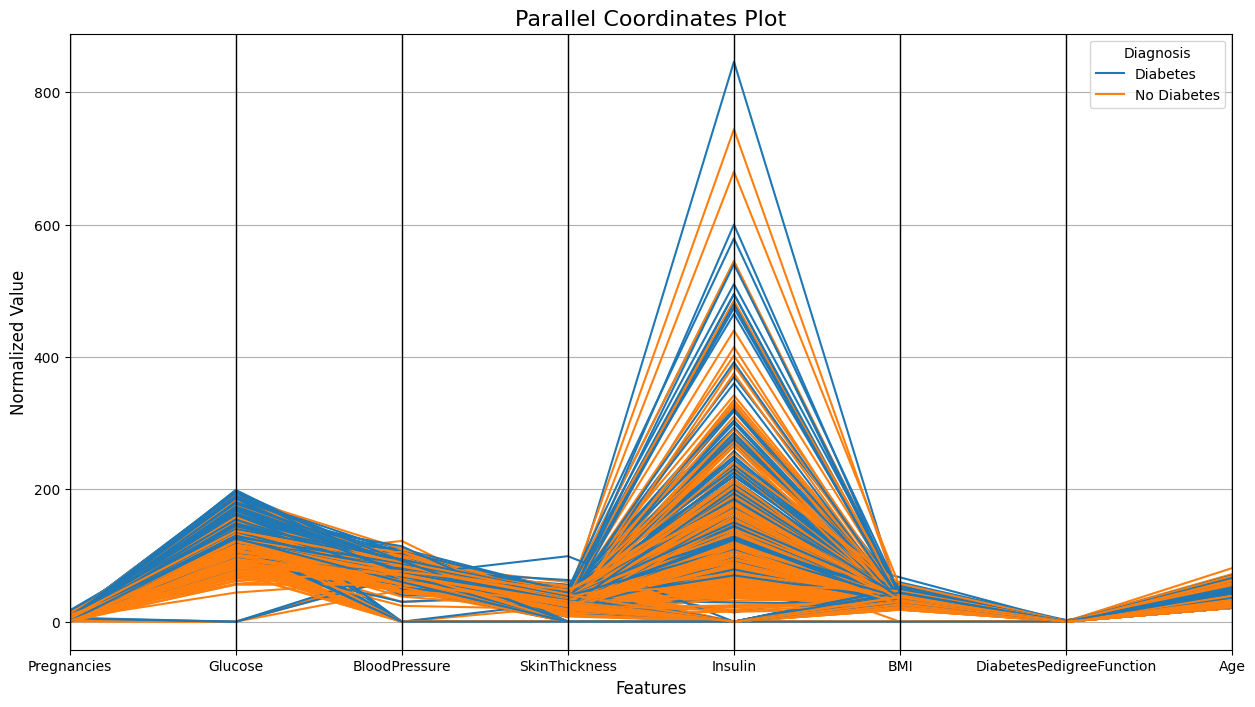

In [7]:
plt.figure(figsize=(15,8))

ax = pd.plotting.parallel_coordinates(total_data, "Outcome", color=['#1f77b4', '#ff7f0e'])
handles, labels = ax.get_legend_handles_labels()
labels = ["Diabetes", "No Diabetes"]
ax.legend(handles, labels, title="Diagnosis")
plt.title('Parallel Coordinates Plot', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)

plt.show()

**Conclusions:**
- `Insulin` is the variable that has the most significant impact on the target variable, followed by a more moderate impact from `Glucose`.

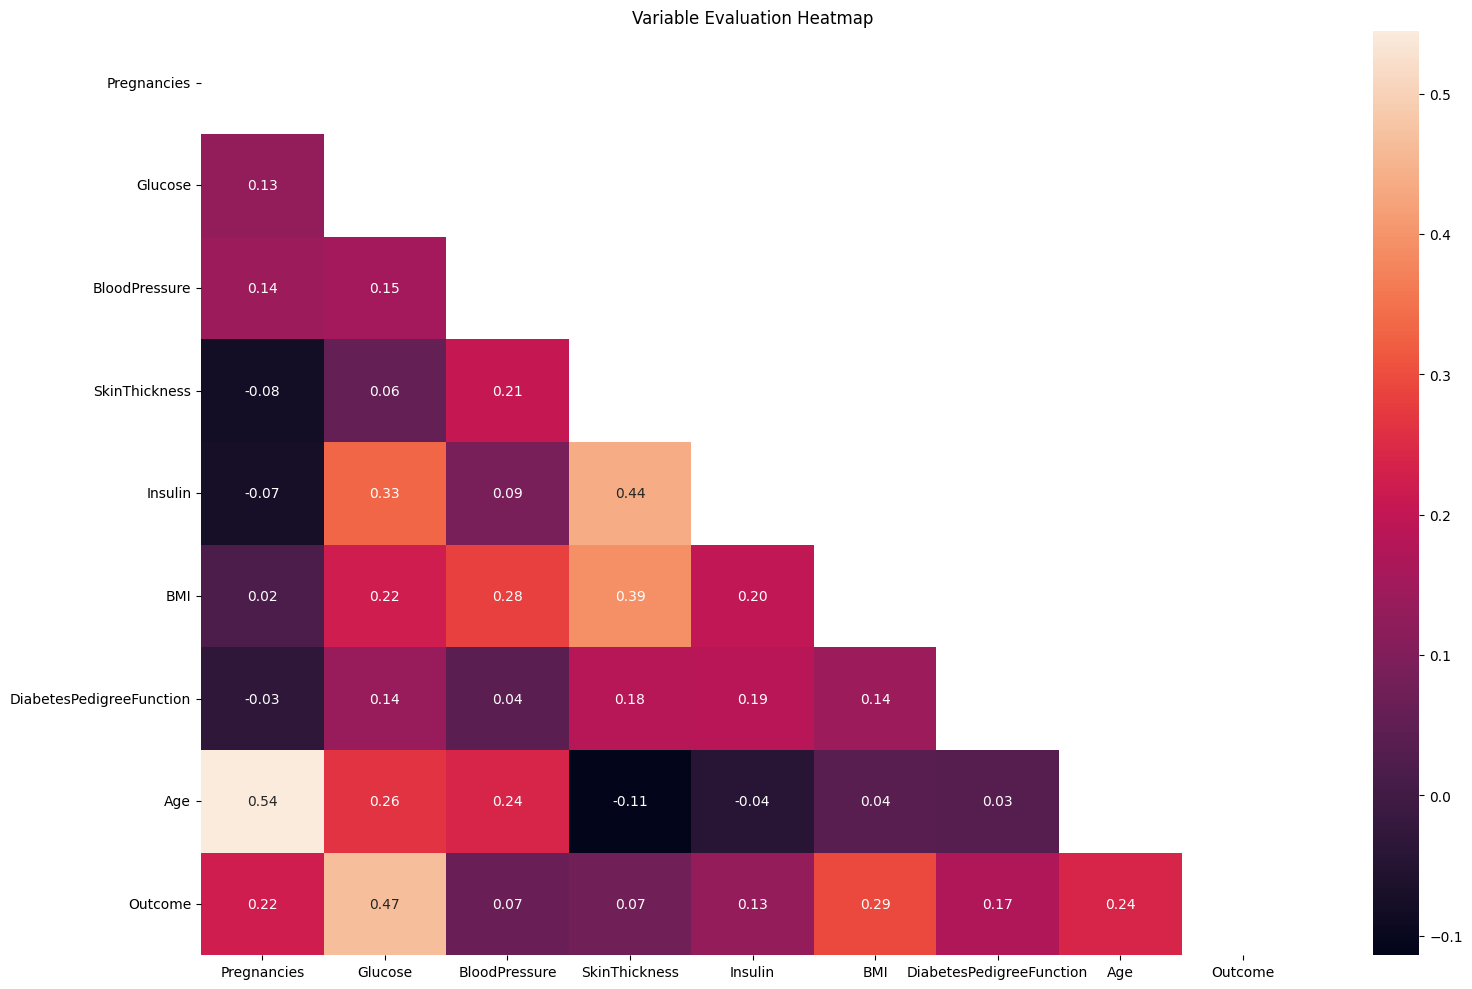

In [8]:
plt.figure(figsize=(16,10))
columns = total_data.columns
sns.heatmap(total_data[columns].corr(), annot = True, fmt = ".2f", mask=np.triu(total_data[columns].corr()))
plt.title('Variable Evaluation Heatmap')
plt.tight_layout()
plt.show()

**Conclusions:**

- **Strongest Positive Correlation with 'Outcome'**: There is no positive correlation with the 'Outcome' variable, indicating that none of the numerical variables have a strong positive relationship with the likelihood of developing diabetes.
- **Strongest Negative Correlation with 'Outcome'**: `Glucose` has the strongest negative correlation with the 'Outcome' variable, with a correlation coefficient of -0.47. This suggests that higher glucose levels are associated with a diabetes diagnosis, which is expected as high glucose levels are a key indicator of diabetes.
- **Other Strong Negative Correlations with 'Outcome'**: `BMI`, `Age`, `Pregnancies`, and `Insulin` also show significant negative correlations with the 'Outcome' variable, with coefficients of -0.29, -0.24, -0.22, -0.21 and -0.13 respectively. This indicates that higher values in these variables are associated with a higher likelihood of diabetes. This is expected as these variables are known as risk factors for diabetes.

## 6. Feature Engineering <a id='c6'></a>

### 6.1 New Feature Inference <a id='c6-1'></a>

No new features will be created in this analysis, as the current set of variables is deemed sufficient for accurately capturing the relationships and insights needed for predicting medical conditions.

### 6.2 Outliers Analysis <a id='c6-2'></a>

In [9]:
total_data.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


We have to remove outliers from all variables.

In [10]:
total_data_WITH_outliers = total_data.copy()

total_data_WITHOUT_outliers = total_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: (x if (x <= upper_limit) else upper_limit) if not pd.isna(x) else np.nan)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: (x if (x >= lower_limit) else lower_limit) if not pd.isna(x) else np.nan)
  return df.copy(), {"lower_limit": lower_limit, "upper_limit": upper_limit}

outliers_dict = {}

output_dir = os.path.join('outliers_lims')
os.makedirs(output_dir, exist_ok=True)

for column in total_data.columns:
  total_data_WITHOUT_outliers, limit_list = replace_outliers_from_column(column, total_data_WITHOUT_outliers)
  outliers_dict[column] = limit_list
  filename_outliers = f'./outliers_lims/{column}.json'
  with open(filename_outliers, "w") as f:
        json.dump(limit_list, f, indent=4)


Below we'll show the difference between both dataframes (with outliers and without outliers)

In [11]:
total_data_WITHOUT_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [12]:
total_data_WITH_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 6.3 Missing Values Analysis <a id='c6-3'></a>

We don't have any missing values in this dataset, so we don't need to do anything.

In [13]:
total_data_WITH_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 6.4 Split train/test of both Data Frames <a id='c6-4'></a>

A crucial step in data preparation is splitting the dataset into training (train) and testing (test) sets. This is vital for two main reasons:

- **Prevent Overfitting**: It ensures the model learns generalizable patterns from the train set rather than simply memorizing noise or specific training examples.

- **Evaluate Generalization**: By assessing performance on the unseen test set, we gain a realistic estimate of how well the model will perform on new, real-world data.

In [14]:
def split(target, df, reference: str, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    X_train.to_excel(f'../data/processed/X_train_{reference}.xlsx', index=False)
    X_test.to_excel(f'../data/processed/X_test_{reference}.xlsx', index=False)
    y_train.to_excel('../data/processed/y_train.xlsx', index=False)
    y_test.to_excel('../data/processed/y_test.xlsx', index=False)

    return X_train, X_test, y_train, y_test

In [15]:
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('Outcome', total_data_WITH_outliers, 'with_outliers')
X_train_without_outliers, X_test_without_outliers, _, _ = split('Outcome', total_data_WITHOUT_outliers, 'without_outliers')

try:
    X_train_with_outliers = pd.read_excel('../data/processed/X_train_with_outliers.xlsx')
    X_train_without_outliers = pd.read_excel('../data/processed/X_train_without_outliers.xlsx')

    X_test_with_outliers = pd.read_excel('../data/processed/X_test_with_outliers.xlsx')
    X_test_without_outliers = pd.read_excel('../data/processed/X_test_without_outliers.xlsx')


    # Cargar y_train y y_test (estos son comunes para todos los X)
    y_train = pd.read_excel('../data/processed/y_train.xlsx').squeeze()
    y_test = pd.read_excel('../data/processed/y_test.xlsx').squeeze()

    print("All .xlsx variables readed successfully")

except FileNotFoundError:
    print("Error: Not all preprocessed data files were found..")
except Exception as e:
    print("Unexpected error: ", e)

All .xlsx variables readed successfully


## 7. Data Processing <a id='c7'></a>

### 7.1 Normalization <a id='c7-1'></a>

We'll proceede to normalize and save both dataframes with and without outliers

In [16]:
def norm(X_train:pd.DataFrame, X_test:pd.DataFrame, reference:str):
    scaler = StandardScaler()
    scaler.fit(X_train)

    scaler_filename = os.path.join('../models', f'scaler_{reference}.pkl')
    with open(scaler_filename, "wb") as file:
        pickle.dump(scaler, file)

    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
    X_train_norm.to_excel(f'../data/processed/X_train_{reference}_norm.xlsx', index=False)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)
    X_test_norm.to_excel(f'../data/processed/X_test_{reference}_norm.xlsx', index=False)

    return X_train_norm, X_test_norm

X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

X_train_without_outliers_norm.head()

try:
    X_train_with_outliers_norm = pd.read_excel('../data/processed/X_train_with_outliers_norm.xlsx')
    X_train_without_outliers_norm = pd.read_excel('../data/processed/X_train_without_outliers_norm.xlsx')

    X_test_with_outliers_norm = pd.read_excel('../data/processed/X_test_with_outliers_norm.xlsx')
    X_test_without_outliers_norm = pd.read_excel('../data/processed/X_test_without_outliers_norm.xlsx')

    print("All .xlsx variables readed successfully")

except FileNotFoundError:
    print("Error: Not all preprocessed data files were found..")
except Exception as e:
    print("Unexpected error: ", e)

All .xlsx variables readed successfully


### 7.2 Minmax Scalation <a id='c7-2'></a>

In [17]:
def minmax(X_train:pd.DataFrame, X_test:pd.DataFrame, reference:str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    scaler_filename = os.path.join('../models', f'scaler_{reference}.pkl')
    with open(scaler_filename, "wb") as file:
        pickle.dump(scaler, file)

    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)
    X_train_minmax.to_excel(f'../data/processed/X_train_{reference}_minmax.xlsx', index=False)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    X_test_minmax.to_excel(f'../data/processed/X_test_{reference}_minmax.xlsx', index=False)

    return X_train_minmax, X_test_minmax

X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

X_train_without_outliers_minmax.head()

try:
    X_train_with_outliers_minmax = pd.read_excel('../data/processed/X_train_with_outliers_minmax.xlsx')
    X_train_without_outliers_minmax = pd.read_excel('../data/processed/X_train_without_outliers_minmax.xlsx')

    X_test_with_outliers_minmax = pd.read_excel('../data/processed/X_test_with_outliers_minmax.xlsx')
    X_test_without_outliers_minmax = pd.read_excel('../data/processed/X_test_without_outliers_minmax.xlsx')

    print("All .xlsx variables readed successfully")

except FileNotFoundError:
    print("Error: Not all preprocessed data files were found..")
except Exception as e:
    print("Unexpected error: ", e)

All .xlsx variables readed successfully


## 8. Machine Learning <a id='c8'></a>

### 8.1 Which is the best dataset? <a id='c8-1'></a>

Now we choose the best dataset

In [18]:
results = []

dataset_references = {
    "X_train_with_outliers": (X_train_with_outliers, X_test_with_outliers),
    "X_train_without_outliers": (X_train_without_outliers, X_test_without_outliers),
    "X_train_with_outliers_norm": (X_train_with_outliers_norm, X_test_with_outliers_norm),
    "X_train_without_outliers_norm": (X_train_without_outliers_norm, X_test_without_outliers_norm),
    "X_train_with_outliers_minmax": (X_train_with_outliers_minmax, X_test_with_outliers_minmax),
    "X_train_without_outliers_minmax": (X_train_without_outliers_minmax, X_test_without_outliers_minmax),
}

for dataset_name, (X_train, X_test) in dataset_references.items():
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        "dataset_name": dataset_name,
        "accuracy": accuracy
    })

results_df = pd.DataFrame(results).sort_values(by='accuracy', ascending=False)
print(results_df)
winning_dataset_name = results_df.iloc[0]["dataset_name"]
winning_dataset_X_train, best_X_test = dataset_references[winning_dataset_name]
print(f'The best dataset is {winning_dataset_name} with a {accuracy * 100:.4f}% of accuracy')

                      dataset_name  accuracy
1         X_train_without_outliers  0.766234
3    X_train_without_outliers_norm  0.766234
5  X_train_without_outliers_minmax  0.766234
2       X_train_with_outliers_norm  0.759740
0            X_train_with_outliers  0.753247
4     X_train_with_outliers_minmax  0.753247
The best dataset is X_train_without_outliers with a 76.6234% of accuracy


Now we can visualize how the tree-decision model works. For this task we'll limit the depth and leafs so we can see the decision tree more clearly but the actual model works with all the complexity required.

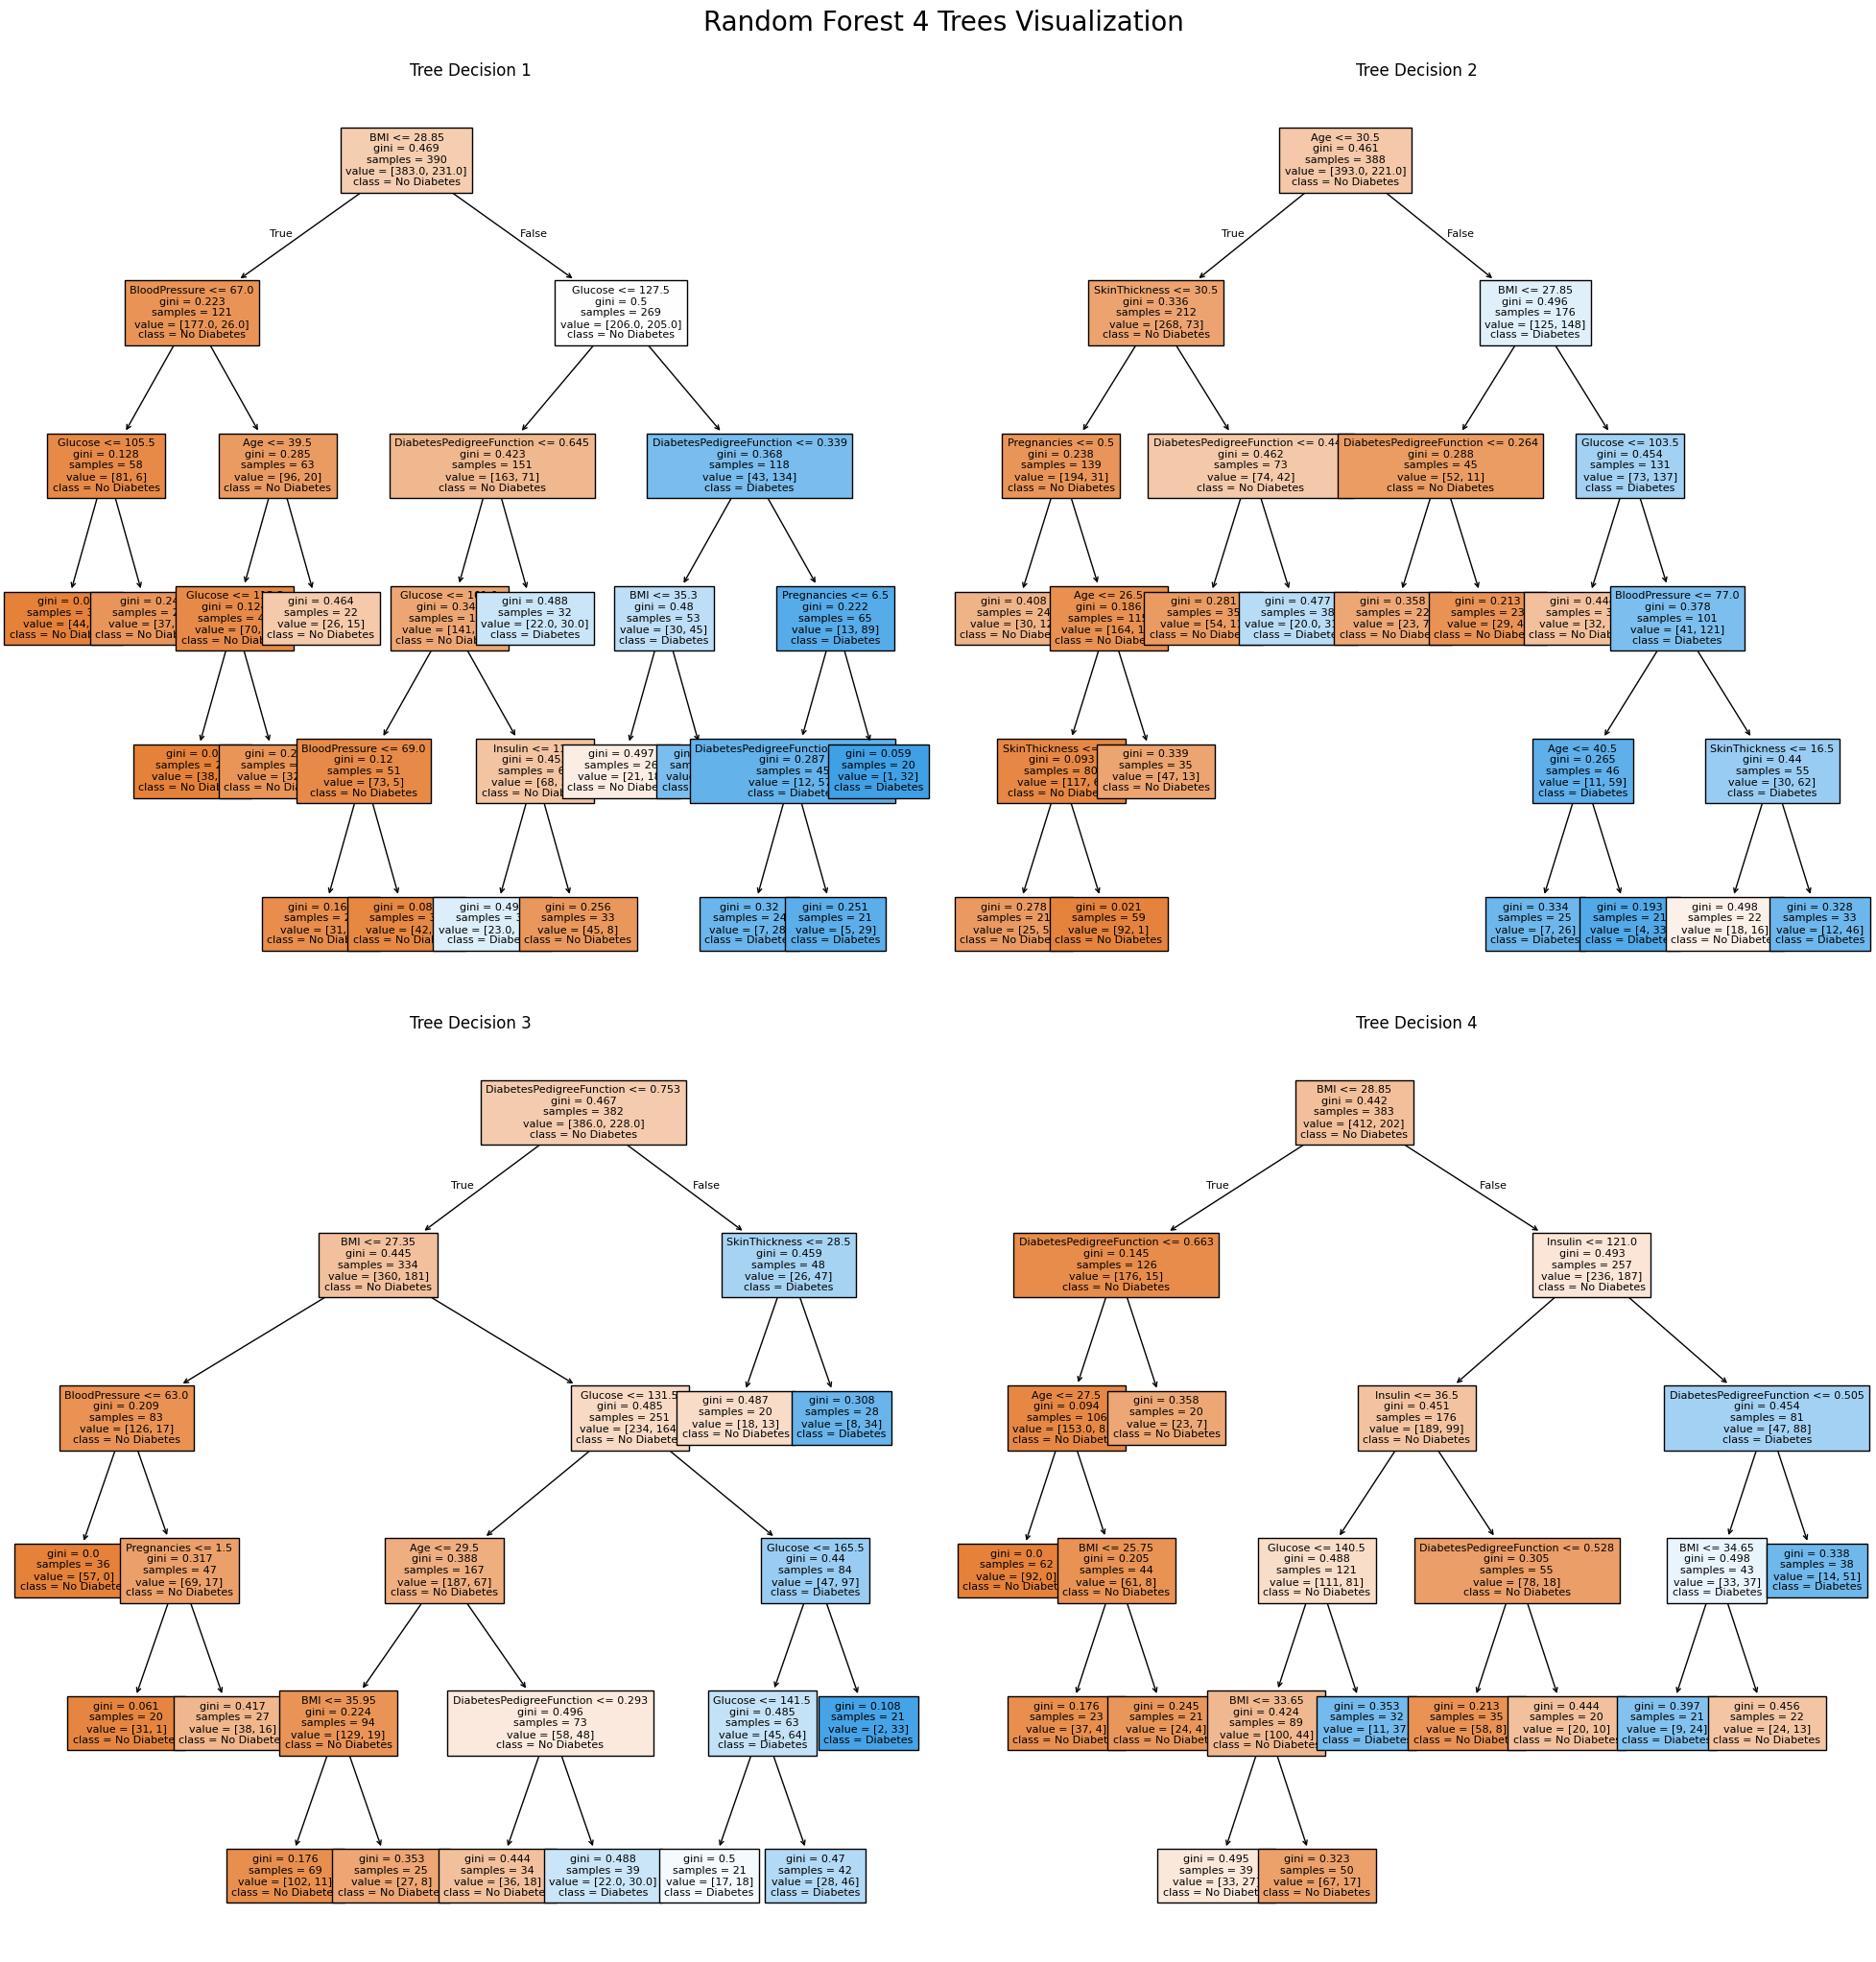

In [22]:
best_model = RandomForestClassifier(random_state=42, max_depth=5, min_samples_leaf=20)
best_model.fit(winning_dataset_X_train, y_train)

fig, axes = plt.subplots(2, 2, figsize=(20,20))
axes = axes.flatten()

for i in range(4):
    ax = axes[i]
    plot_tree(
        best_model.estimators_[i],
        feature_names=winning_dataset_X_train.columns.tolist(),
        class_names=['No Diabetes', 'Diabetes'],
        filled=True,
        fontsize=8,
        ax=ax
    )
    ax.set_title(f'Tree Decision {i+1}', fontsize=12)

plt.tight_layout()
plt.suptitle('Random Forest 4 Trees Visualization', fontsize=20, y=1.02)
plt.show()


### 8.2 Model Optimization <a id='c8-2'></a>

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

dt_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(winning_dataset_X_train, y_train)

best_hyperparameters = grid_search.best_params_
best_score = grid_search.best_score_
final_model = grid_search.best_estimator_

print(f"\nBest Hyperparameters found: {best_hyperparameters}")
print(f"Best cross-validation accuracy: {best_score * 100:.4f}%")

route = '../models/'
optimized_model_filename = os.path.join(route, f'optimized_decision_tree_model_{winning_dataset_name}.pkl')
with open(optimized_model_filename, 'wb') as file:
    dump(final_model, file)
print(f'Optimized model saved successfully as: {optimized_model_filename}')

Fitting 5 folds for each of 270 candidates, totalling 1350 fits

Best Hyperparameters found: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 73.7865%
Optimized model saved successfully as: ../models/optimized_decision_tree_model_X_train_with_outliers.pkl


### 8.3 Evaluation of the Model <a id='c8-3'></a>

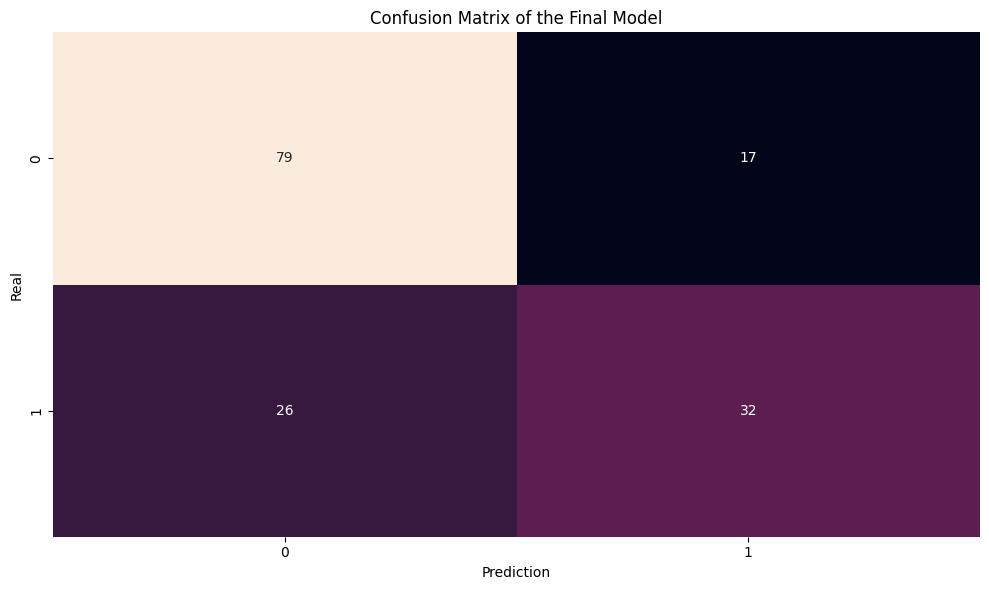


Model Prediction Results:
True Negatives (TN): 79 individuals correctly predicted as NOT diabetics
True Positives (TP): 32 individuals correctly predicted as diabetics
False Positives (FP): 17 individuals incorrectly predicted as diabetics when they aren't
False Negatives (FN): 26 individuals incorrectly predicted as diabetics when they are

Accuracy of the final model: 72.0779%
Classification report               precision    recall  f1-score   support

           0       0.75      0.82      0.79        96
           1       0.65      0.55      0.60        58

    accuracy                           0.72       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.71      0.72      0.72       154



In [ ]:
y_pred_test = final_model.predict(best_X_test)
classification_rep = classification_report(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(10, 6))
plt.title('Confusion Matrix of the Final Model')
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()

print("\nModel Prediction Results:")
print("True Negatives (TN):", f"{tn} individuals correctly predicted as NOT diabetics")
print("True Positives (TP):", f"{tp} individuals correctly predicted as diabetics")
print("False Positives (FP):", f"{fp} individuals incorrectly predicted as diabetics when they aren't")
print("False Negatives (FN):", f"{fn} individuals incorrectly predicted as diabetics when they are\n")
print(f"Accuracy of the final model: {test_accuracy*100:.4f}%")
print('Classification report', classification_rep)